# Problem 5: Python Problem

Heat generated through the biological activity of microorganisms is often temperature dependent such
that biological production is zero at temperature extremes (Tmin=15oC; Tmax=30oC) and maximized at an
optimal temperature (Topt=25oC). Imagine a spherical lump of detritus in a lake that has a diameter of
L=0.02 m and conductivity k=2W/m-K. As it moves through the water column, it loses heat by
convection, h=3.1 W/m2-K, to the surrounding water (Twater=12oC), and it generates heat through
biological activity:

### Equation:


In [28]:
import numpy as np
### Knowns:
# the temperature extremes
Tmin = 15 +273.15# K
Tmax = 30 +273.15 # K
# This is the max optimum temp
Topt = 25 +273.15 #K
Twater = 12 +273.15 #K
L = .02 #m
#diameter of the spherical lump of detrius
k = 2 # W/m-K
# conductivity of the spherical lump
h = 3.1  # W/(m^2 - K)
C_Q = .008 # K/s 
# detritus density:
density = 1000 #kg/m^3
# heat capacity of detritus
c_p = 3500 #J/kg-K

# calculated Area
Area = 4*np.pi*(L/2)**2
print(Area)
# calculated the volume:
volume = np.pi*(4/3)*(L/2)**3
print(volume)

# calculated the mass
mass = density * volume
print(mass)
 

0.0012566370614359172
4.188790204786391e-06
0.004188790204786391


#### 5a write Q as a function of T



-0.0


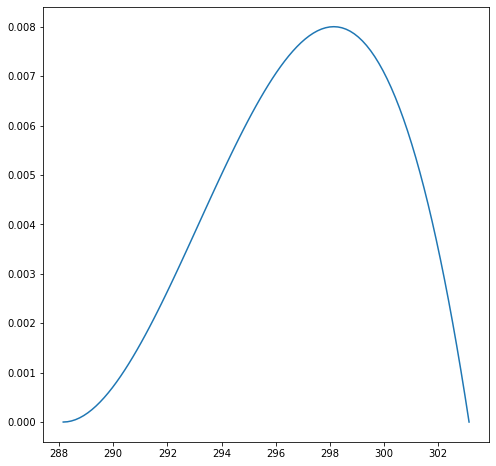

In [29]:
#CORRECT...

import numpy as np
import matplotlib.pyplot as plt
def QofT(T):
    """Function to plot Q as a function of T
    This function takes an input of T"""
    array_Q = np.empty(len(T))
    for temp in np.arange(len(T)):
        if T[temp] > Tmin or T[temp] < Tmax:
            #print(T[temp])
            Q_numerator = C_Q*(T[temp]-Tmax)*((T[temp]-Tmin)**2)
            Q_denominator = (Topt - Tmin)*((Topt-Tmin)*(T[temp]-Topt)-(Topt-Tmax)*(Topt+Tmin-2*T[temp]))
            Q_of_T =  Q_numerator/Q_denominator
            array_Q[temp] = Q_of_T
        elif Tmin >= T[temp] or T >= Tmax:
            array_Q[temp] = 0
   # print("currently testing")
    return array_Q
def plotQofT(T,ax):
    vals_Q = QofT(tarray)
    ax.plot(T, vals_Q)
# set an array of temperature values from Tmin to T max
tarray = np.linspace(Tmin,Tmax,100)
QofT(tarray)

# set the axis
fig = plt.figure()
fig.set_size_inches(8,8)
ax5a = plt.subplot(1,1,1)
a = QofT(tarray)
print(a[len(tarray)-1])
plotQofT(tarray, ax5a)


#### 5b write dT/dt as a function of T

> In this problem it doesn't detail that the time is a factor in the change of the temperature so as such it is safe to assume that it operates under steady conditions
> However:
   * The lump **loses heat** by *convection*
   * There are reactions
      * the lump **generates heat** through reactions 
      * The reactions are zero at the temperature extremes
      

In [30]:
# if above logic is incorrect I checked to see if we could use lumped parameter
###### Checked the Biot Number to see uf we can use lumped parameter
###### Bi = (h*L)/k
Bi = (h * L) /k
if Bi < .1:
    print("Use Lumped Parameter")
else:
    print("We cannot ignore space and thus must need to account for it with a different method")

Use Lumped Parameter


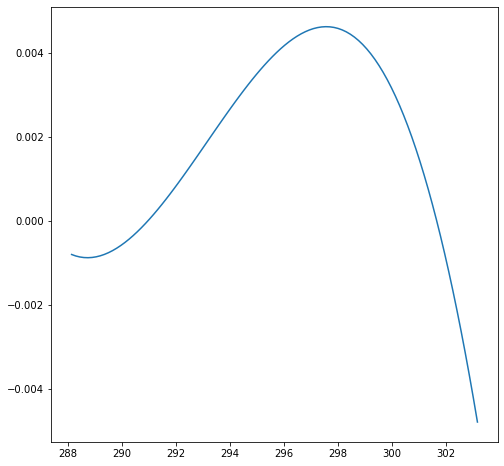

In [33]:
### Q is the heat generation for reaction term...
# Referenced the prior temp of T
tarray = np.linspace(Tmin,Tmax,100)
# Called the function QofT
dT_dt = np.empty(len(tarray))

# for temperature in np.arange(len(tarray)):
dT_dt = (-h*Area/(mass*c_p))*(tarray-Twater) + QofT(tarray)

# the plotted
fig = plt.figure()
fig.set_size_inches(8,8)
ax5b = plt.subplot(1,1,1)
ax5b.plot(tarray, dT_dt)


### SHOULD BE A BUMP....ero line is high up on DT/dt crosses through three points..
####### intersections with 0 are steady states...
####### 
### ODEINT DPhase diagrams of ODES/...

In [ ]:
# Since this problem is steady this implies that dT/dt is zero and thus it will be a constant change in temperature..
